In [1]:
from time import localtime, strftime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D)

from tensorflow.keras.callbacks import TensorBoard


In [2]:
tf.__version__

'2.2.0'

In [3]:
# set up tensorboard keras callback to visualize learning
curr_time = strftime('time-%H-%M', localtime())
architecture = '32x32x128x10'
MODEL_NAME = f'cifar10-CNN-{architecture}-{curr_time}'
tensorboard = TensorBoard(log_dir=f'cifar10_logs/{MODEL_NAME}')

In [4]:
# retrieve and load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Keras: X_train, X_test: uint8 arrays of RGB image data with shape (num_samples, 3, 32, 32)
# Keras: y_train, y_test: uint8 arrays of category labels (integers in range 0-9) each with shape (num_samples, 1) 

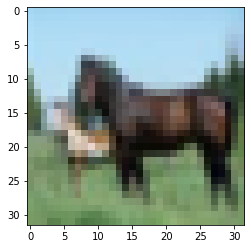

[7]


"\nclasses:\n[0] = 'airplane'\n[1] = 'automobile'\n[2] = 'bird'\n[3] = 'cat'\n[4] = 'deer'\n[5] = 'dog'\n[6] = 'frog'\n[7] = 'horse'\n[8] = 'ship'\n[9] = 'truck'\n"

In [5]:
# visualize raw sample data
plt.imshow(X_train[12], interpolation='nearest')
plt.show()
print(y_train[12])

'''
classes:
[0] = 'airplane'
[1] = 'automobile'
[2] = 'bird'
[3] = 'cat'
[4] = 'deer'
[5] = 'dog'
[6] = 'frog'
[7] = 'horse'
[8] = 'ship'
[9] = 'truck'
'''

In [6]:
# normalize data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

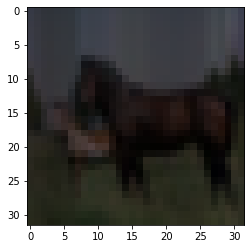

[7]


In [7]:
# visualize normalized sample
plt.imshow(X_train[12], interpolation='nearest')
plt.show()
print(y_train[12])

In [8]:
# training paramaters
batch_size = 10
n_epochs = 20

In [9]:
# Create model architecture

model = Sequential()

# first layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second layer
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# convert 3D feature maps to 1D vectors
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# output layer 
model.add(Dense(10))
model.add(Activation('softmax'))

# specify cost function and optimized
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train model
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_test, y_test), callbacks=[tensorboard])


Epoch 1/20
5000/5000 [==============================] - 141s 28ms/step - loss: 1.7949 - accuracy: 0.3456 - val_loss: 1.4703 - val_accuracy: 0.4743
Epoch 2/20
5000/5000 [==============================] - 131s 26ms/step - loss: 1.5123 - accuracy: 0.4606 - val_loss: 1.3136 - val_accuracy: 0.5395
Epoch 3/20
5000/5000 [==============================] - 132s 26ms/step - loss: 1.4213 - accuracy: 0.4951 - val_loss: 1.2342 - val_accuracy: 0.5697
Epoch 4/20
5000/5000 [==============================] - 130s 26ms/step - loss: 1.3635 - accuracy: 0.5184 - val_loss: 1.1986 - val_accuracy: 0.5792
Epoch 5/20
5000/5000 [==============================] - 130s 26ms/step - loss: 1.3228 - accuracy: 0.5367 - val_loss: 1.2139 - val_accuracy: 0.5757
Epoch 6/20
5000/5000 [==============================] - 128s 26ms/step - loss: 1.2961 - accuracy: 0.5427 - val_loss: 1.1360 - val_accuracy: 0.6032
Epoch 7/20
5000/5000 [==============================] - 130s 26ms/step - loss: 1.2695 - accuracy: 0.5552 - val_loss: 1